In [3]:
#Load the required libraries
import scipy
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### Load the Dataset

In [4]:
data=pd.read_csv("SUV_Purchase.csv")
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Explore the dataset

In [5]:
#check the size of dataset (How many rows and columns)
data.shape

(400, 5)

In [6]:
#Check for statistical information
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Data Cleaning

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
#check for null values
data.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15566689  Female  35   57000            0            1
15728773  Male    27   58000            0            1
15734312  Male    38   71000            0            1
15734161  Female  37   93000            1            1
15733973  Female  47   113000           1            1
                                                    ..
15654296  Female  50   20000            1            1
15654230  Female  55   130000           1            1
15652400  Female  38   50000            0            1
15651983  Male    34   112000           1            1
15815236  Female  45   131000           1            1
Length: 400, dtype: int64

In [9]:
#check for null values
data.isnull().count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

User ID               AxesSubplot(0.125,0.536818;0.352273x0.343182)
Age                AxesSubplot(0.547727,0.536818;0.352273x0.343182)
EstimatedSalary          AxesSubplot(0.125,0.125;0.352273x0.343182)
Purchased             AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

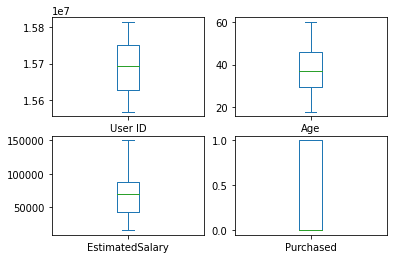

In [10]:
data.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)

In [11]:
#check for duplicated values
data.duplicated(subset=None,keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

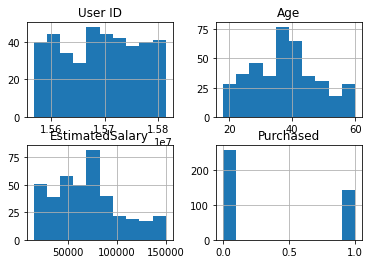

In [12]:
data.hist()
plt.show()

## Logistic regression 

#### Fit a Classifier to the data and provide predictions for future customers.
#### Steps to follow :
    #Data Pre-processing step
    #Fitting Logistic Regression to the Training set
    #Predicting the test result
    #Test accuracy of the result(Creation of Confusion matrix)
    #Visualizing the test set result.

In [13]:
#Train a Model
#declare dependent and independent variable

x=data.iloc[:,[2,3]].values #Age and Estimated Salary
y=data.iloc[:,4].values #Purchased column

In [51]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Splittling the dataset into training data and test data

In [16]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test= model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

In [38]:
#scale down data and transform it 

#[Variables that are measured at different scales do not contribute 
#equally to the model fitting & model learned function and might end up creating a bias]

#Standardise the data(so that mean is 0 and standard deviation is 1)
#StandardScaler arranges the data in a standard normal distribution.

from sklearn.preprocessing import StandardScaler

In [39]:
#create instance for Scaler Oblect Model
sc=StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [42]:
y_pred =classifier.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.87

In [45]:
#verify with confusion matrix

#Confusion matrix is a matrix that allows you to visualize the performance of the
#classification machine learning model

from sklearn.metrics import confusion_matrix

#generate the confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[63  5]
 [ 8 24]]


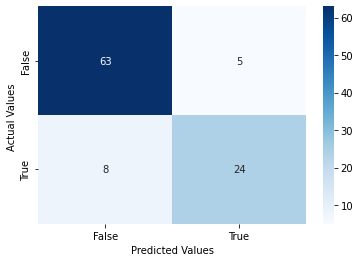

In [46]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

#Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

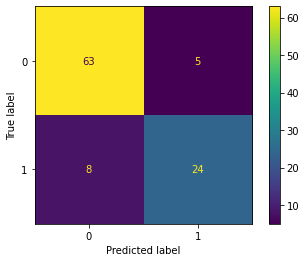

In [138]:
#Visulaising the test results in confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()